In [125]:
file = open('Data.txt','r') 

In [126]:
data_positive = ""
for line in file:
    curr = line.split()
    word = 4
    #print(curr)
    while (len(curr[word])>=2 and curr[word][-2]=='#'):
        curr_word=curr[word][:-2]
        if (float(curr[3])!=0):
            recur=round(float(curr[3])*10)
            for i in range(0,int(recur)):
                data_positive = data_positive+" "+curr_word
        word = word+1
            

In [128]:
file = open('Data.txt','r') 
positive_table = []
for line in file:
    curr = line.split()
    word = 4
    while (len(curr[word])>=2 and curr[word][-2]=='#'):
        curr_word=curr[word][:-2]
        if (float(curr[2])!=0):
            positive_score = str(int(float(curr[2])/0.125))
            new_word = curr_word+"#"+positive_score
            positive_table.append(new_word)
        word = word + 1

In [129]:
file = open('Data.txt','r') 
negative_table = []
for line in file:
    curr = line.split()
    word = 4
    while (len(curr[word])>=2 and curr[word][-2]=='#'):
        curr_word=curr[word][:-2]
        if (float(curr[3])!=0):
            negative_score = str(int(float(curr[3])/0.125))
            new_word = curr_word+"#"+negative_score
            negative_table.append(new_word)
        word = word + 1

In [130]:
file = open('final_data.txt','r') 
positive_word_cloud = ""
for line in file:
    curr_data = line.split()
    for i in range(0, len(curr_data)):
        curr_word = curr_data[i]
        #make everything lowercases
        curr_word = curr_word.lower()
        #remove symbol
        while(len(curr_word)>=1 and (curr_word[-1]>'z' or curr_word[-1]<'a')):
            curr_word = curr_word[:-1]
        for i in range(1,9):
            test_word = curr_word+"#"+str(i)
            if (test_word in positive_table):
                recur = test_word[-1]
                for i in range(0,int(recur)):
                    positive_word_cloud = positive_word_cloud+" "+curr_word
            
        
        
        
        

IOError: [Errno 2] No such file or directory: 'final_data.txt'

In [ ]:
file = open('final_data.txt','r') 
negative_word_cloud = ""
for line in file:
    curr_data = line.split()
    for i in range(0, len(curr_data)):
        curr_word = curr_data[i]
        #make everything lowercases
        curr_word = curr_word.lower()
        #remove symbol
        while(len(curr_word)>=1 and (curr_word[-1]>'z' or curr_word[-1]<'a')):
            curr_word = curr_word[:-1]
        for i in range(1,9):
            test_word = curr_word+"#"+str(i)
            if (test_word in negative_table):
                recur = test_word[-1]
                for i in range(0,int(recur)):
                    negative_word_cloud = negative_word_cloud+" "+curr_word
            

In [ ]:
import math
test_word = "worst"
nij=0
dij=0
D=0
j=0
file = open('final_data.txt','r') 
for line in file:
    D=D+1
    flag=False
    curr_data = line.split()
    for i in range(0, len(curr_data)):
        curr_word = curr_data[i]
        curr_word = curr_word.lower()
        while(len(curr_word)>=1 and (curr_word[-1]>'z' or curr_word[-1]<'a')):
            curr_word = curr_word[:-1]
        dij=dij+1
        if (test_word==curr_word):
            nij=nij+1
        if (curr_word==test_word and flag==False):
            j=j+1
            flag=True
tf = float(nij)/dij 
idf = math.log(float(D)/j,10)
print(tf*idf)       

In [1]:
###########################
###########################
##########################
#########GEOG480##########
##########################
##########################
##########################
#twitter data input
with open("2014_02_chicago.twt") as f:
    content = f.readlines()
content = [x.strip() for x in content] 
data = []
for i in range(0,len(content)):
    data.append(content[i].split('\x01'))

In [2]:
file = open('Data.txt','r') 
positive_table = []
for line in file:
    curr = line.split()
    word = 4
    while (len(curr[word])>=2 and curr[word][-2]=='#'):
        curr_word=curr[word][:-2]
        if (float(curr[2])!=0):
            positive_score = str(int(float(curr[2])/0.125))
            new_word = curr_word+"#"+positive_score
            positive_table.append(new_word)
        word = word + 1

In [3]:
file = open('Data.txt','r') 
negative_table = []
for line in file:
    curr = line.split()
    word = 4
    while (len(curr[word])>=2 and curr[word][-2]=='#'):
        curr_word=curr[word][:-2]
        if (float(curr[3])!=0):
            negative_score = str(int(float(curr[3])/0.125))
            new_word = curr_word+"#"+negative_score
            negative_table.append(new_word)
        word = word + 1

In [4]:
import pandas as pd
import geopandas
from geopandas import GeoSeries, GeoDataFrame

In [5]:
area = geopandas.read_file("Boundaries - Community Areas (current).geojson")

In [6]:
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import time
time.ctime()
print(time.strftime('%l:%M%p %Z on %b %d, %Y'))
emotion_array=[0]*77
number_array=[0]*77
result_array=[0]*77
for i in range(0,100000):###test case for smaller number number len(data
    if (i%100==0):
        print(i)
    content = data[i][1]
    lng=float(data[i][2].split(',')[1])
    lat=float(data[i][2].split(',')[0])
    p = Point(lng, lat)
    score = 0
    #print(p)
    for word in content.split():
        #make lowercase
        curr_word = word.lower()
        #remove symbol
        while(len(curr_word)>=1 and (curr_word[-1]>'z' or curr_word[-1]<'a')):
            curr_word = curr_word[:-1]
        while(len(curr_word)>=1 and (curr_word[0]>'z' or curr_word[0]<'a')):
            curr_word = curr_word[1:]
        #print(curr_word)
        for i in range(1,9):
            test_word = curr_word+"#"+str(i)
            if (test_word in positive_table):
                score = score+i
            if (test_word in negative_table):
                score = score-i
    for i in range(0,77):
        if(p.within(area['geometry'][i])):
            emotion_array[i]=emotion_array[i]+score
            number_array[i]=number_array[i]+1
time.ctime()
print(time.strftime('%l:%M%p %Z on %b %d, %Y'))

11:09AM CDT on Apr 25, 2019
0
100
200
300


KeyboardInterrupt: 

In [ ]:
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import time
time.ctime()
print(time.strftime('%l:%M%p %Z on %b %d, %Y'))
emotion_array_2=[0]*77
number_array_2=[0]*77
result_array=[0]*77
for i in range(100000,500000):###test case for smaller number number len(data
    if (i%100==0):
        print(i)
    content = data[i][1]
    lng=float(data[i][2].split(',')[1])
    lat=float(data[i][2].split(',')[0])
    p = Point(lng, lat)
    score = 0
    #print(p)
    for word in content.split():
        #make lowercase
        curr_word = word.lower()
        #remove symbol
        while(len(curr_word)>=1 and (curr_word[-1]>'z' or curr_word[-1]<'a')):
            curr_word = curr_word[:-1]
        while(len(curr_word)>=1 and (curr_word[0]>'z' or curr_word[0]<'a')):
            curr_word = curr_word[1:]
        #print(curr_word)
        for i in range(1,9):
            test_word = curr_word+"#"+str(i)
            if (test_word in positive_table):
                score = score+i
            if (test_word in negative_table):
                score = score-i
    for i in range(0,77):
        if(p.within(area['geometry'][i])):
            emotion_array_2[i]=emotion_array_2[i]+score
            number_array_2[i]=number_array_2[i]+1
time.ctime()
print(time.strftime('%l:%M%p %Z on %b %d, %Y'))

In [4]:
emotion_array_final=[0]*77
number_array_final=[0]*77
result_array_final=[0]*77

for i in range(0,77):
    emotion_array_final[i]=emotion_array[i]+emotion_array_2[i]
    number_array_final[i]=number_array[i]+number_array_2[i]
    result_array_final[i]=float(emotion_array_final[i])/float(number_array_final[i])

NameError: name 'emotion_array' is not defined

In [183]:
for i in range(0,77):
    area['area'][i]=unicode(result_array_final[i])

In [184]:
area

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,2.82296650718,46004621.1581,0,35,35,0,0,31027.0545098,(POLYGON ((-87.60914087617894 41.8446925026539...
1,OAKLAND,4.15572858732,16913961.0408,0,36,36,0,0,19565.5061533,(POLYGON ((-87.59215283879394 41.8169293462668...
2,FULLER PARK,1.45445641528,19916704.8692,0,37,37,0,0,25339.0897503,(POLYGON ((-87.62879823733725 41.8018930336891...
3,GRAND BOULEVARD,2.55316329911,48492503.1554,0,38,38,0,0,28196.8371573,(POLYGON ((-87.6067081256125 41.81681377057218...
4,KENWOOD,2.69548511047,29071741.9283,0,39,39,0,0,23325.1679062,(POLYGON ((-87.59215283879394 41.8169293462668...
5,LINCOLN SQUARE,3.57065706571,71352328.2399,0,4,4,0,0,36624.6030848,(POLYGON ((-87.6744075678037 41.97610340441675...
6,WASHINGTON PARK,1.37463126844,42373881.4842,0,40,40,0,0,28175.3160866,(POLYGON ((-87.60603749217005 41.7858740649942...
7,HYDE PARK,2.91456361725,45105380.1732,0,41,41,0,0,29746.7082016,(POLYGON ((-87.58037662085418 41.8025250220512...
8,WOODLAWN,2.28354237932,57815179.512,0,42,42,0,0,46936.9592443,(POLYGON ((-87.57714456891335 41.7861464101343...
9,ROGERS PARK,3.34442887176,51259902.4506,0,1,1,0,0,34052.3975757,(POLYGON ((-87.65455590025104 41.9981661497025...


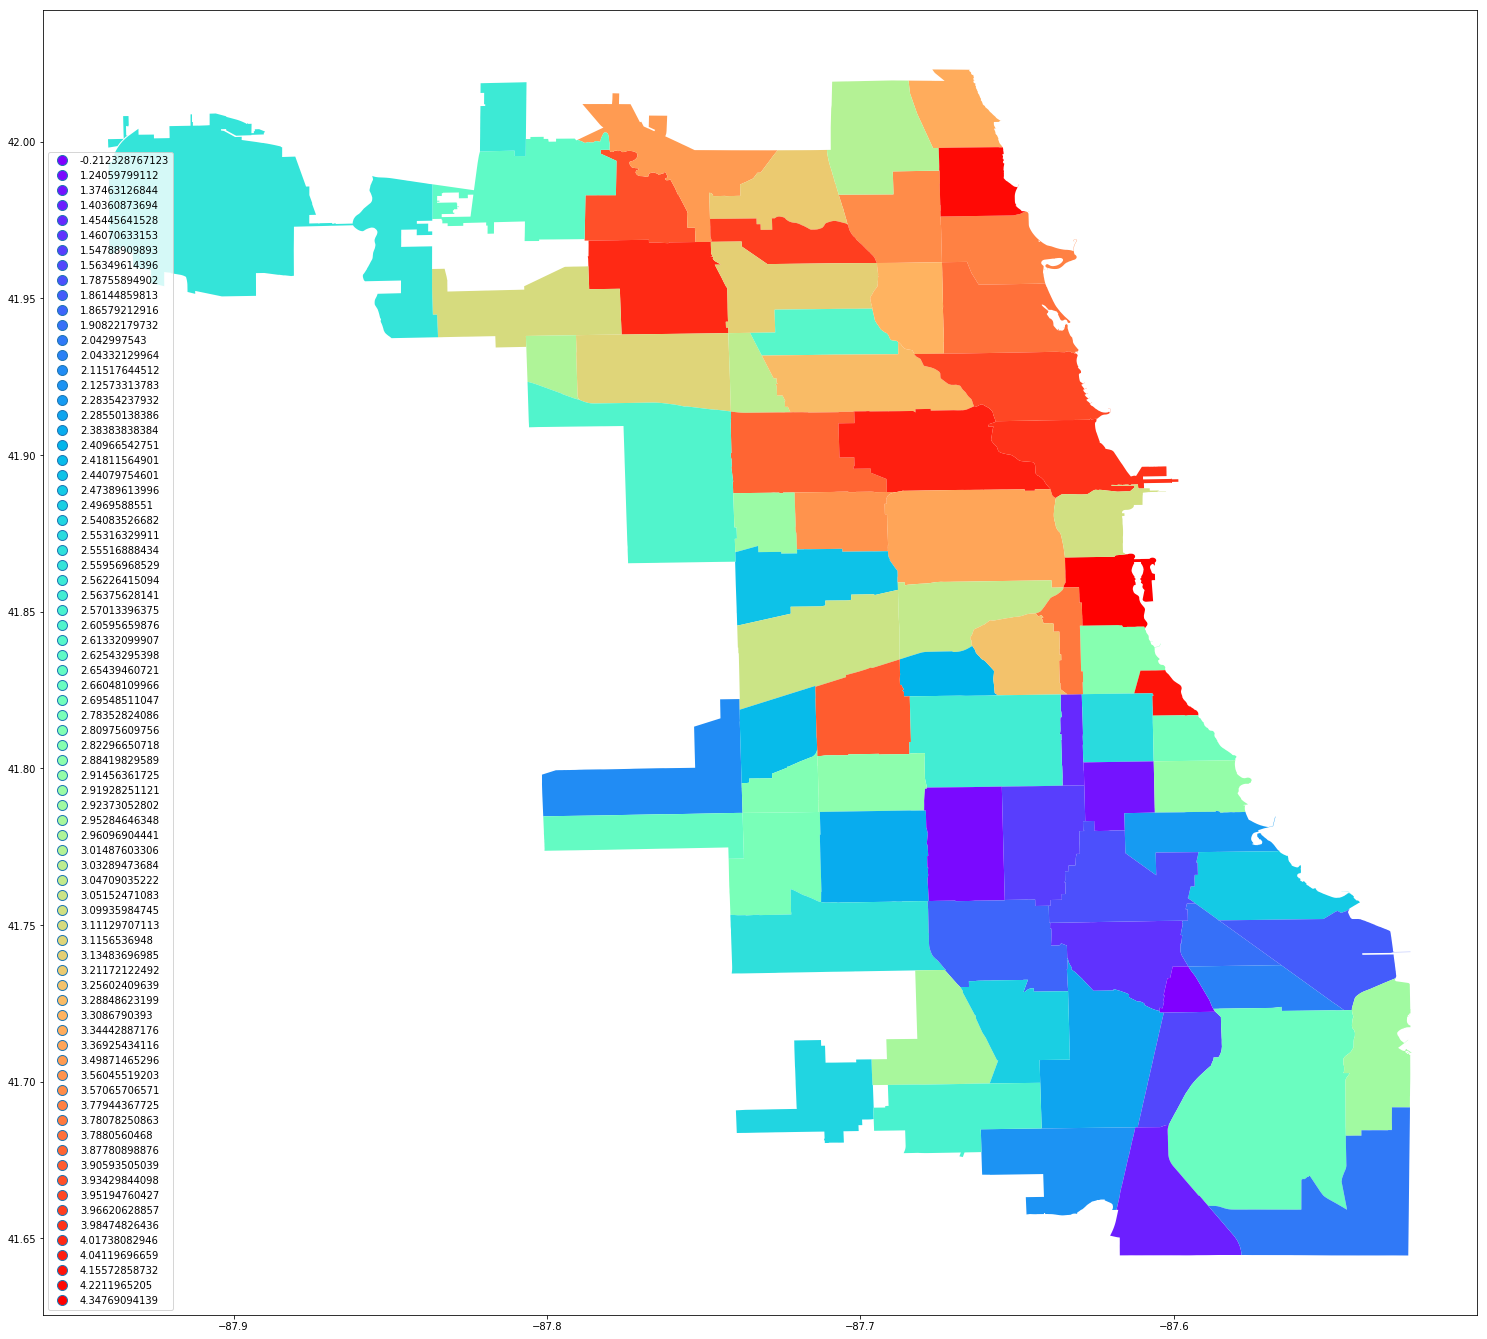

In [190]:
import matplotlib
from descartes import PolygonPatch
%matplotlib inline
area.plot(column='area', cmap='rainbow', legend=True, k=10, figsize=(36,24),legend_kwds={'loc':'lower left'})


In [1]:
area

NameError: name 'area' is not defined